# Quantifying Shakespeare

in this notebook we will find the frequencies with which shakespeare's words used letters. 

In [30]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]:
    """Given the name of a file, return the list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower()
        if line != "":
            lines.append(line)
    return lines

shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))


114588


the next step of our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter. 

In [31]:
# Goal: define a function named `tally`
# Give the function (as params) a dictionary reference (key: str, value: int) and a key 
# If the key is in the dictionary, increase values by 1
# Otherwise, set key's value to 1
# It is a procedure and its retun type is None


def tally(count: dict[str, int], key: str) -> None:
    """Mutate count to increment a key by 1 if it exists, or  initialize to 1."""
    # for key in count:
    if key in count:
        count[key] += 1
    else:
        count[key] = 1


def count_letters(lines: list[str]) -> dict[str, int]:
    """Count freuqencies of all letters in a list of strings."""
    count: dict[str, int] = {}
   # loop through all lines
    for line in lines:
   # for each line, loop through all chacters
        for char in line:
   # tally character into the counts dictionary 
   # challenge: tally only letter! no numbers or puncuation. 
            if char.isalpha(): #  OR - if char >= 'a' and char <= 'z':
                tally(count, char)
    return count

shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'t': 328842, 'h': 236511, 'e': 445863, 's': 248362, 'o': 313674, 'n': 242624, 'b': 61710, 'y': 94113, 'w': 89256, 'i': 253101, 'l': 169537, 'a': 288468, 'm': 111147, 'k': 35350, 'p': 58183, 'r': 237046, 'f': 80297, 'c': 87713, 'u': 128643, 'd': 149018, 'g': 68018, 'v': 37479, 'z': 1626, 'x': 5211, 'q': 3577, 'j': 4746}


let's create a visualization of this data w a bar chart

In [32]:
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
# item = pair of key and value == tuple
items_in_dict = sorted(items_in_dict)
sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)



{'a': 288468, 'b': 61710, 'c': 87713, 'd': 149018, 'e': 445863, 'f': 80297, 'g': 68018, 'h': 236511, 'i': 253101, 'j': 4746, 'k': 35350, 'l': 169537, 'm': 111147, 'n': 242624, 'o': 313674, 'p': 58183, 'q': 3577, 'r': 237046, 's': 248362, 't': 328842, 'u': 128643, 'v': 37479, 'w': 89256, 'x': 5211, 'y': 94113, 'z': 1626}


<BarContainer object of 26 artists>

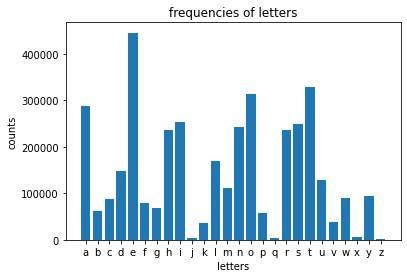

In [33]:
from matplotlib import pyplot

pyplot.title("frequencies of letters")
pyplot.xlabel("letters")
pyplot.ylabel("counts")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
pyplot.bar(labels, values)
